# Lecture 9: Classification1 Part 2
3 Examples of K-Nearest Neighbors Classification (KNN)

### Example 1:
Warm up.

Suppose that we have a training set __X__, with a set of known labels __Y__. Then we use those to initialize the model. (In this case, we set k = 1.)

In [4]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors 
#the lists below are points on a graph
X= np.array([[1,1,3,4],
             [2,1,5,5],
             [5,5,1,2],
             [5,4,1,3],
             [5,5,1,1]])
Y = np.array([1,2,3,4,5])
nbrs = neighbors.KNeighborsClassifier(1) # the (1) specifics how many neighbors to look for
nbrs.fit(X, Y)

KNeighborsClassifier(n_neighbors=1)

Now, suppose we would like to classify the following testing set __T__, we do that as follows:

In [9]:
T= np.array([[1,2,3,1],
             [5,3,2,1]])
nbrs.predict(T) #output runs prediction ' tells us point 1 is closest to class 1

array([1, 5])

### Example 2: 
Let's do real example with [Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

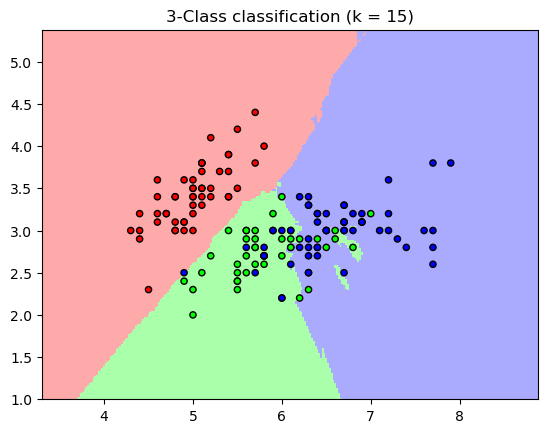

In [17]:
#Iris Dataset is standard dataset used for classification

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)"
          % (n_neighbors))

plt.show()

There are different weighting schemes available:

* Uniform: all points in the set of k closest neighbors are weighted equally. (Default in sklearn)
* Distance: Points are weighted by 1/distance.

Try
```
clf = neighbors.KNeighborsClassifier(n_neighbors, weights="distance")
```
in above example.

### Example 3: 
A-Z

First split the training and testing sets.

In [20]:
import sklearn.model_selection as ms
X = iris.data
Y = iris.target

XTrain, XTest, YTrain, YTest = ms.train_test_split(X, Y, test_size= 0.3, random_state=7)

In [38]:
from sklearn.model_selection import GridSearchCV

k_neighbours = list(range(1,21,2))   #step size 2 because you only want odd numbers to avoid tie issue
n_grid = [{'n_neighbors': k_neighbours}]

model = neighbors.KNeighborsClassifier()
cv_knn = GridSearchCV(estimator=model, param_grid=n_grid, cv=ms.KFold(n_splits=10))
cv_knn.fit(XTrain, YTrain)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}])

This is the best $K$ for the **training** set.

In [49]:
best_k = cv_knn.best_params_['n_neighbors']
print(best_k) #best k to use based off of cross validation

11


Use best $K$ to predict test set.

In [56]:
knnclf = neighbors.KNeighborsClassifier(n_neighbors=best_k)
knnclf.fit(XTrain, YTrain)

y_pred = knnclf.predict(XTest)
print(y_pred)

[2 1 0 1 1 0 1 1 0 1 2 1 0 2 0 2 2 2 0 0 1 2 1 2 2 2 1 1 2 2 1 1 0 2 1 0 0
 0 0 2 2 1 2 2 1]


Print Confusion Matrix or Classification Report

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(YTest,y_pred)

array([[12,  0,  0],
       [ 0, 14,  2],
       [ 0,  2, 15]], dtype=int64)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(YTest, y_pred))
#support values are the number of samples in each class (class 0, class 1, class 2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88        16
           2       0.88      0.88      0.88        17

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45



$F_1$ score provides a measure of classification quality based on the precision and recall:
$$ F_1=2 \frac{precision\times recall}{precision+recall}$$
where 1 is the best possible value and 0 is the worst possible value.